## BEST PLACE TO BUY CONDOMENIUM FLAT FOR AIRBNB BUSINESS IN KAMPALA UGANDA

##### Applied Data Science Capstone by IBM/Coursera

## Introduction: Business Problem <a name="introduction"></a>

An investment club wishes to buy several condominium flats and list them on Airbnb and the location of the flats should meet the following criteria:
1.	Should be within 7km radius off the Kampala Central Business District
2. Should be close to the best Restaurants located within the defined area in (1) above since majority people who use Airbnb are tourists and conference participants 

#### Data acquisition and cleaning <a name="data"></a>

To obtain data on Restaurants , I signed up for Google Places API . I parsed the Json data and saved it an excel file and added it to my github repository.(link to data). Google places Api limits the search to only 60 restaurants and i had run it several times to obtain more data and it is what is presented in the dataset.
Data was also obtained on Kamapal Venues using fourquare API.

#### Data overview

Using this data let us properly answer all question and see a full picture of Kampala Restaurants. Data will enable us to properly group restaurant based on  ratings and locations.  
Data on Kampala venues will be obtained from FourSquare Api,parsed into a dataframe and visualise using Folium.
Since the two Apis return different sets of data, clustering will be done on each dataset and best locations (those with best resturants) recommended .

### Here we import the necesassary libraries

In [101]:
import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from folium import plugins

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns   
print('Libraries imported.')

Libraries imported.


In [25]:
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

## Dealing with Google Places Api first.
It was aquired and stored into excel (code not included here since not relevant.
* Read the data into Pandas dataframe and find out the records we have.

In [10]:
geo_kampala = pd.read_excel('Kampala_Resturants.xlsx')
geo_kampala.shape

(78, 6)

### Exploratory Data Analysis

Read the top five records

In [11]:
geo_kampala.head(5)

,Name,rating,user_ratings_total,Latitude,Longtude,Address
0,Staff Canteen (Jesh Dinning Services),4.0,10,0.334222,32.569432,"Pool Road, Kampala"
1,Kampala Forest Resort,4.2,911,0.294270,32.614990,Plot 7141 block 244 house 28 Muyenga tank hill...
2,X,3.8,19,0.346974,32.583401,"Next to maimood, Kampala"
3,Hyper Restaurant,3.0,1,0.331894,32.574834,"Haji Musa Kasule Road, Kampala"
4,Immanuel Restaurant,3.0,1,0.332016,32.572568,"Hall Lane, Kampala"


In [ ]:
# examine column types
geo_kampala.info()

#### Is there much difference in ratings?. Let us draw a box plot.

{'whiskers': [<matplotlib.lines.Line2D at 0x20da1b475f8>,
 'caps': [<matplotlib.lines.Line2D at 0x20da1b47cf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x20da1a279e8>],
 'medians': [<matplotlib.lines.Line2D at 0x20da1b533c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x20da1b53710>],
 'means': []}

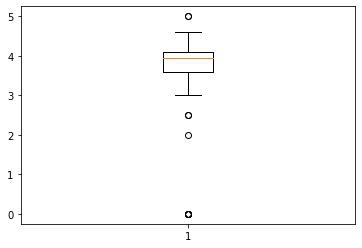

In [102]:
plt.boxplot(geo_kampala['rating'])

* The outliers are those with ratings of 0 and 5. The rest are within the IQR part

* lets us plot the rating using a barchart

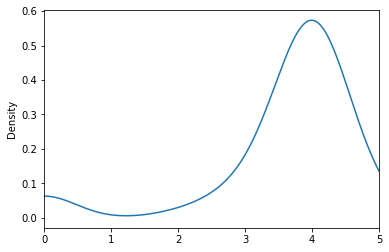

In [103]:
geo_kampala['rating'].plot.kde(xlim = (geo_kampala['rating'].min(),
                                    geo_kampala['rating'].max()
                                    ))

* Can be seen that most ratings are between 3 and 4

#### I use  geopy library to get the latitude and longitude values of Kampala City to show locations of different resturants

In [13]:
address = 'Kampala, Uganda'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Kampala, Uganda are {}, {}.'.format(latitude, longitude))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


The geograpical coordinate of Kampala, Uganda are 0.3177137, 32.5813539.


######  Create a map of Kampala with Resturants  superimposed on top

In [14]:
# create map of kampala using latitude and longitude values
map_kampala = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, area in zip(geo_kampala['Latitude'], geo_kampala['Longtude'], geo_kampala['Address']):
    label = '{}'.format(area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_kampala)  
    
map_kampala

# Aquire data from FourSquare Api
* Foursquare API to explore the venues and segment them.

In [15]:
CLIENT_ID = 'M3ZR54V4M4UR0FPDUQD04PNMQK4DWZGS1CCDF33GRQBQFRYC' # your Foursquare ID
CLIENT_SECRET = '3YDTG2OE35THIDOOMOWMVRBIFMW0CPY3RROVQ5MMFLF2K3QH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: M3ZR54V4M4UR0FPDUQD04PNMQK4DWZGS1CCDF33GRQBQFRYC
CLIENT_SECRET:3YDTG2OE35THIDOOMOWMVRBIFMW0CPY3RROVQ5MMFLF2K3QH


* Now, let's get the top 100 venues that are in Kampala  within a radius of 7000 meters(7km) as per our requirements

In [17]:
radius=7000 # 7km within kampala
LIMIT=100


Here i utilise the kampala city location data

In [18]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=M3ZR54V4M4UR0FPDUQD04PNMQK4DWZGS1CCDF33GRQBQFRYC&client_secret=3YDTG2OE35THIDOOMOWMVRBIFMW0CPY3RROVQ5MMFLF2K3QH&v=20180605&ll=0.3177137,32.5813539&radius=7000&limit=100'

In [90]:
results = requests.get(url).json()
#results

In [20]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

* Parse the data into a dataframe and display top rows of the data
* Find out the number of rows returned by using shape

In [21]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Karveli Bakery And More,Coffee Shop,0.317370,32.578702
1,"Cafe Javas, Cargen House",Café,0.312543,32.585079
2,Serena Hotel Kampala,Hotel,0.318466,32.586736
3,Mediterraneo Restaurant,Italian Restaurant,0.329679,32.587031
4,Cafe Javas,Café,0.318257,32.592262


In [22]:
nearby_venues.shape

(94, 4)

In [60]:
#nearby_venues['categories'].value_counts()

* Let us display the venues on the map

In [23]:
# create map of kampala using latitude and longitude values
map_kampala = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, area in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['name']):
    label = '{}'.format(area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_kampala)  
    
map_kampala

# Cluster resturants and venues.
Google Places API and Foursquare API give different venues/resturant.Therefore i will cluster each data set and present different results for each

* For Google Places API, i will use the following features to cluster the resturant:rating,Latitude,Longtude.
So we drop some columns in the df

In [28]:
df_cluster = geo_kampala.drop(['Name','user_ratings_total','Address'], axis=1)

In [38]:
X = df_cluster.values

In [40]:
X = np.nan_to_num(X)

* Let us Transform data for use by the algorithm 

In [44]:
cluster_dataset = StandardScaler().fit_transform(X)
#cluster_dataset

##### Run k-means to cluster the Resturants into 5 clusters

In [45]:
num_clusters = 5

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[0 4 0 0 0 3 0 0 0 0 0 4 0 0 2 0 4 1 0 4 4 4 0 4 0 4 4 4 0 0 3 0 4 4 4 0 0
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 3 4 0 2 2 0 2 0 0 0 4 3 4 4 3 0 0
 0 0 0 4]


num_clusters = 5

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

In [47]:
geo_kampala["Labels"] = labels
geo_kampala.head(3)

,Name,rating,user_ratings_total,Latitude,Longtude,Address,Labels
0,Staff Canteen (Jesh Dinning Services),4.0,10,0.334222,32.569432,"Pool Road, Kampala",0
1,Kampala Forest Resort,4.2,911,0.294270,32.614990,Plot 7141 block 244 house 28 Muyenga tank hill...,4
2,X,3.8,19,0.346974,32.583401,"Next to maimood, Kampala",0


##### Finally, let's visualize the resulting clusters

In [50]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(num_clusters)
ys = [i + x + (i*x)**2 for i in range(num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(geo_kampala['Latitude'], geo_kampala['Longtude'], geo_kampala['Address'], geo_kampala['Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#####  FINDINGS:

###### Major clusters of Resturants are found in areas of Nakasero,Kololo,Kabalagal,Bugolobi and Wandegeya

##### Let us find the location of best rated  .
* Let us define best as those with rating of 4 and above.

In [52]:
df_best=geo_kampala[geo_kampala['rating']>=4]

#### Finally, let's visualize the resulting clusters of best rated and their clusters

In [54]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(num_clusters)
ys = [i + x + (i*x)**2 for i in range(num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_best['Latitude'], df_best['Longtude'], df_best['Address'], df_best['Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

######  Conclusion: Most of the best  rated Resturants are found in Nakasero and Kololo and therefore the best place to aquire a Airbnb property is Nakasero and Kololo.

# Let us cluster Four Square API data
* hot encoding categories 

In [74]:
nearby_venues_encode = pd.get_dummies(nearby_venues[['categories']], prefix="", prefix_sep="")

* Add back the necessary columns

In [76]:
#nearby_venues
nearby_venues_encode['lat']=nearby_venues['lat']
#nearby_venues_encode['name']=nearby_venues['name']
nearby_venues_encode['lng']=nearby_venues['lng']

* Here the values are converted into an array for processing by the algorithm

In [78]:
X = nearby_venues_encode.values

In [79]:
X = np.nan_to_num(X)

In [82]:
cluster_dataset_4sqr = StandardScaler().fit_transform(X)

In [83]:
num_clusters = 5

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset_4sqr)
labels = k_means.labels_

print(labels)

[2 2 3 2 2 3 2 2 2 2 2 2 2 2 2 3 2 2 2 3 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 4 2 3 2 1 2 1 2 1 2 1 2 2 1 3 2 2 2 1 1 2 2 0 1 2 2 1
 2 2 2 2 2 2 1 2 2 1 3 1 1 1 0 0 1 2 1 2]


In [86]:
nearby_venues_encode["Labels"] = labels

#nearby_venues_encode.head(3)

In [87]:
nearby_venues_encode["name"]=nearby_venues['name']

### Finally we visualise the data

In [89]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(num_clusters)
ys = [i + x + (i*x)**2 for i in range(num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nearby_venues_encode['lat'], nearby_venues_encode['lng'], nearby_venues_encode['name'], nearby_venues_encode['Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Conclusion <a name="introduction"></a>
Most vanues are clustered around Nakasero,Kololo,Wandegeya,Bugolobi. 
Therefore the property for purchase should be from those areas above